<a href="https://colab.research.google.com/gist/Larinwa/cb57e5fc4561b012bc3564989e5c4341/project_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing the Impact of Socio-Economic and Health Indicators on Life Expectancy: A Comparative Study of Developed and Developing Countries

***

### Introduction
This project aims to analyze the factors influencing life expectancy across different countries and regions, focusing on socio-economic and health-related indicators. Life expectancy is a key measure of a country's overall health and development, and understanding the factors that affect it can provide valuable insights for policymakers and health organizations. The project investigates the relationship between life expectancy and various indicators such as GDP per capita, schooling, infant mortality, and other health metrics.

The primary objective of this study is to identify and analyze the key socio-economic and health factors that significantly affect life expectancy. Specifically, the project focuses on:

- GDP per capita: Investigating the impact of economic development on life expectancy.
- Schooling: Examining the relationship between education and health outcomes.
- Infant Mortality: Analyzing how higher infant mortality rates are associated with lower life expectancy.
  
By using Statistical techniques, this study will identify patterns and correlations between these variables, ultimately providing insights into how targeted policies can improve life expectancy globally. The following feature variables will be considered for the analysis:

- GDP per capita: A key indicator of a country's economic development.
- Schooling: The average years of education, representing access to education.
- Infant mortality: The number of deaths per 1,000 live births, reflecting healthcare quality.
- Other health indicators: Including HIV prevalence, immunization rates, and disease incidence.

This project will use visualizations and statistical analysis to explore these relationships and identify significant predictors of life expectancy.

In [ ]:
# Description: import the libraries needed to carry out the project

# data wrangling
import pandas as pd
import numpy as np

# data visualization & Statistical analysis
from  plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Stattistical analysis
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import ttest_1samp
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy.stats import pearsonr, chi2_contingency
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
sns.set_style('darkgrid')
sns.set_palette('husl')

In [ ]:
#load data
my_df = pd.read_csv('Life-Expectancy-Data-Averaged.csv')

###  STEP 1:  Data Inspection
* Examining the dataset and its variables:

In [ ]:
my_df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status,Life_expectancy
0,Afghanistan,Asia,2007.5,71.08125,98.61250,265.804969,0.016125,64.5625,24.3750,22.46250,55.3750,55.1250,0.022500,408.5625,27.450625,16.58125,15.58125,2.90000,1.0,59.65625
1,Albania,Rest of Europe,2007.5,15.25625,17.14375,83.132969,4.696875,98.0000,95.9375,25.85625,98.1250,98.0625,0.025625,3071.1250,2.969375,1.61875,1.70000,9.24375,1.0,75.95000
2,Algeria,Africa,2007.5,26.75625,31.19375,113.439281,0.400625,88.3125,93.2500,24.86875,91.7500,91.8750,0.021875,3745.1250,34.820625,6.09375,5.97500,6.99375,1.0,73.78750
3,Angola,Africa,2007.5,88.76875,144.16250,297.844063,4.935625,68.8125,64.0000,22.51875,35.7500,55.5625,1.303750,2647.8125,21.623750,6.19375,6.66875,4.60625,1.0,52.82500
4,Antigua and Barbuda,Central America and Caribbean,2007.5,9.47500,11.51875,142.478813,7.755000,98.2500,75.4375,25.85000,96.9375,98.3125,0.125000,14678.7500,0.085000,3.42500,3.37500,9.01875,1.0,75.35000


In [ ]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      179 non-null    object 
 1   Region                       179 non-null    object 
 2   Year                         179 non-null    float64
 3   Infant_deaths                179 non-null    float64
 4   Under_five_deaths            179 non-null    float64
 5   Adult_mortality              179 non-null    float64
 6   Alcohol_consumption          179 non-null    float64
 7   Hepatitis_B                  179 non-null    float64
 8   Measles                      179 non-null    float64
 9   BMI                          179 non-null    float64
 10  Polio                        179 non-null    float64
 11  Diphtheria                   179 non-null    float64
 12  Incidents_HIV                179 non-null    float64
 13  GDP_per_capita      

In [ ]:
my_df.duplicated().sum()

0

In [ ]:
my_df.columns

Index(['Country', 'Region', 'Year', 'Infant_deaths', 'Under_five_deaths',
       'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status',
       'Life_expectancy'],
      dtype='object')

##### Insight:
Inspecting the dataset has revealed that te total number of observations are 179, with 20 features of which there are no missing values nor were they duplictated.

###  STEP 2:  Data visualization
* Visualizing region_based analysis, Key impact and trends

In [ ]:

fig = px.choropleth(my_df,
                    locations='Region',
                    color='Life_expectancy',
                    hover_name='Region',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    projection="natural earth")

fig.update_layout(title='Life Expectancy by Region')
fig.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



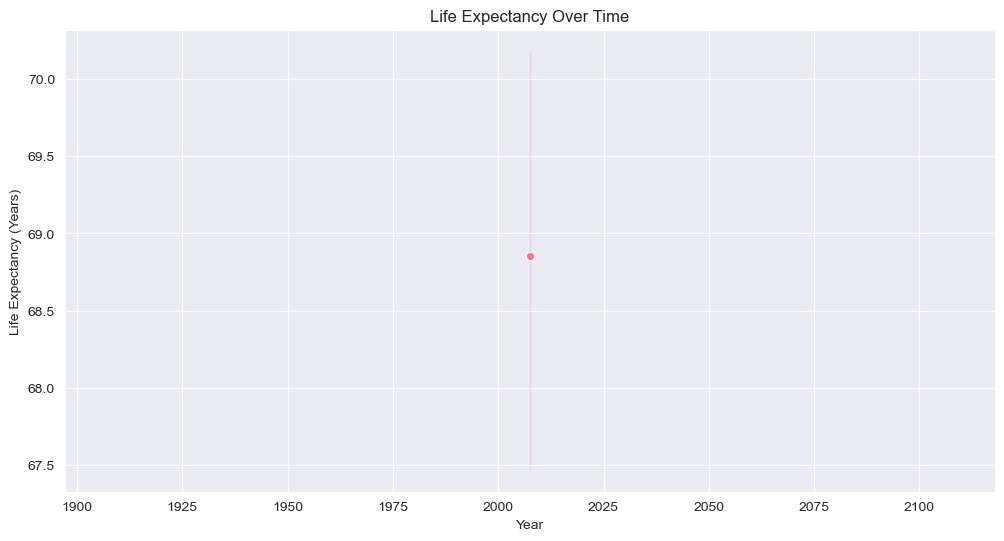

In [ ]:
#If the dataset spans multiple years, you can use line plots to demonstrate how life expectancy changes over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Life_expectancy', data=my_df, marker='o')

plt.title('Life Expectancy Over Time')
plt.xlabel('Year')
plt.ylabel('Life Expectancy (Years)')
plt.grid(True)
plt.show()

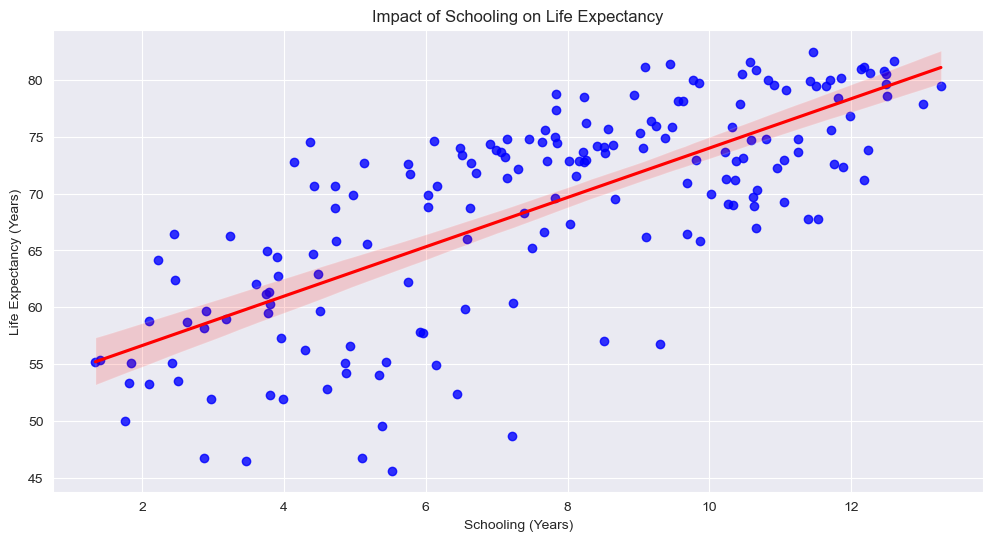

In [ ]:
plt.figure(figsize=(12, 6))
sns.regplot(x='Schooling', y='Life_expectancy', data=my_df, scatter_kws={'color':'blue'}, line_kws={'color':'red'})

plt.title('Impact of Schooling on Life Expectancy')
plt.xlabel('Schooling (Years)')
plt.ylabel('Life Expectancy (Years)')
plt.show()


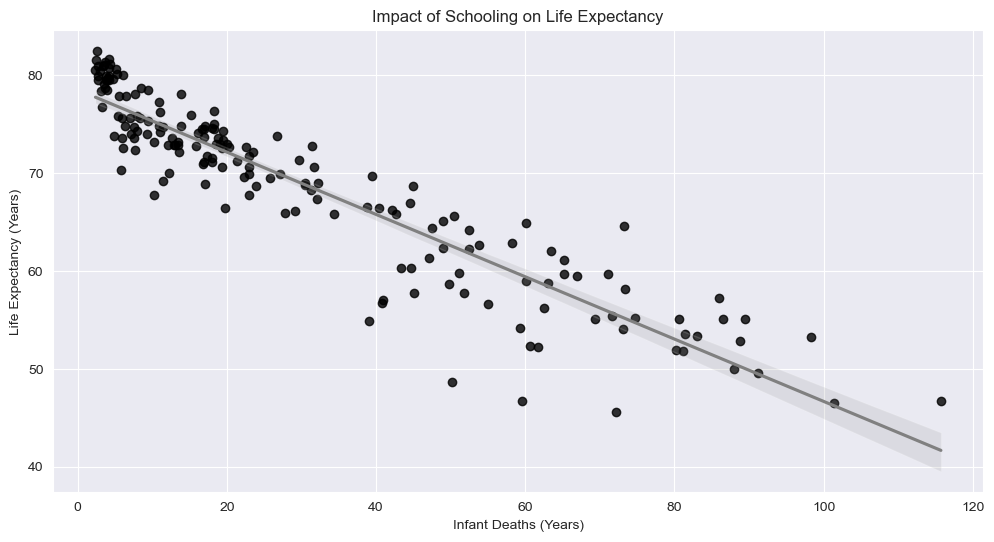

In [ ]:
plt.figure(figsize=(12, 6))
sns.regplot(x='Infant_deaths', y='Life_expectancy', data=my_df, scatter_kws={'color':'Black'}, line_kws={'color':'grey'})

plt.title('Impact of Schooling on Life Expectancy')
plt.xlabel('Infant Deaths (Years)')
plt.ylabel('Life Expectancy (Years)')
plt.show()

##### Insight:
In this section, a choropleth map was created to visualize life expectancy by region, and line plots were used to show changes in life expectancy over time. Regression plots demonstrated the impact of schooling and infant mortality on life expectancy. The chart reveals a strong linear relationship between schooling and life expectancy, where increased schooling is associated with higher life expectancy. Similarly, infant mortality shows a negative linear relationship with life expectancy: as infant mortality increases, life expectancy tends to decrease.

## Step 3: Exploratory Data Analysis

### Univariate Analysis:

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Schooling', ylabel='Count'>

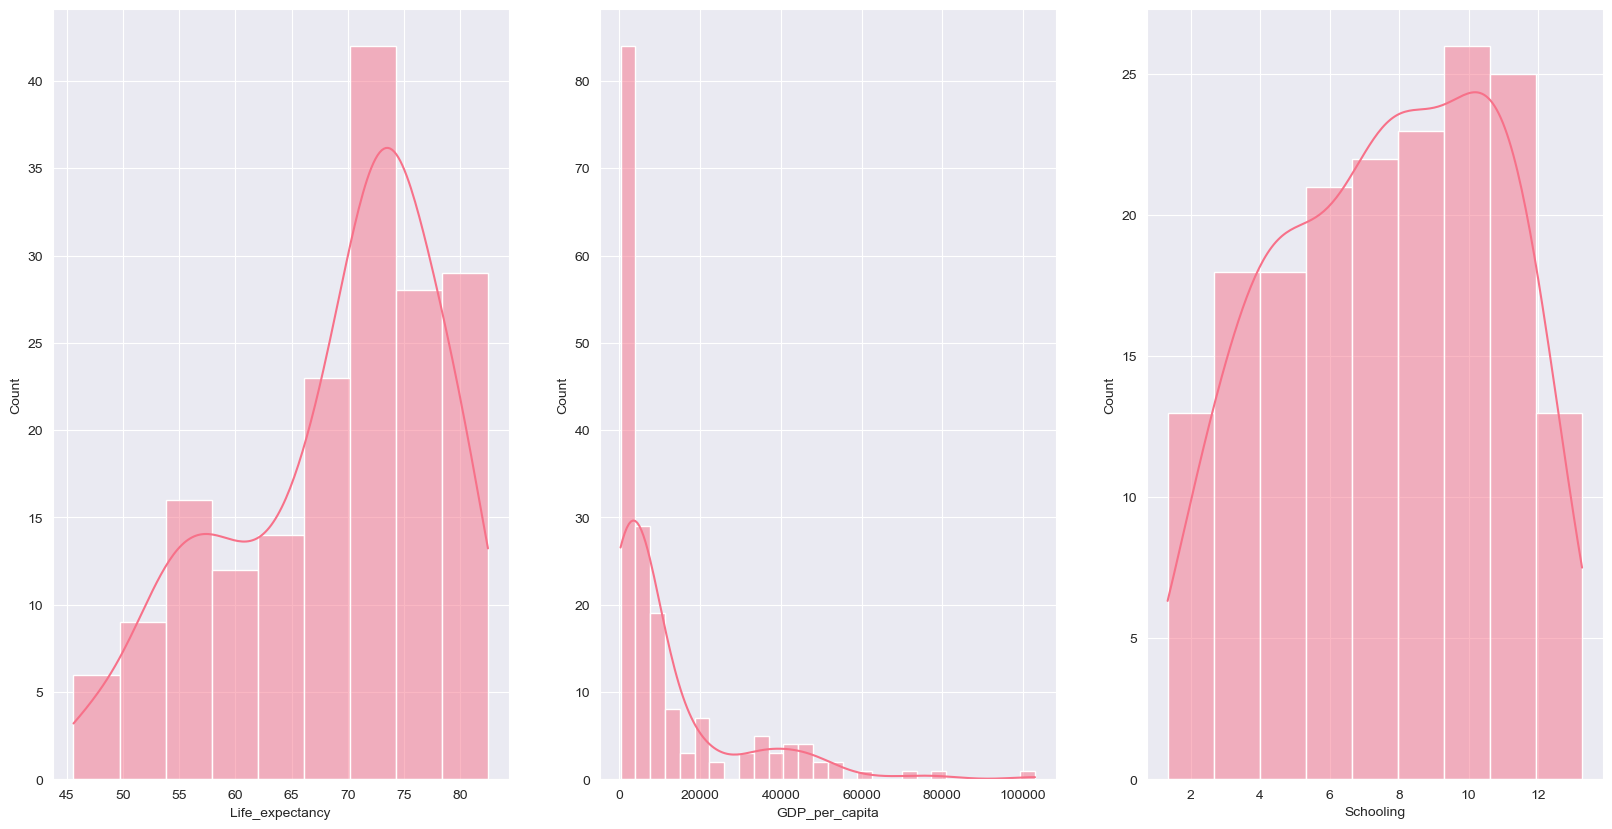

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (20,10))
sns.histplot(data=my_df, x = 'Life_expectancy', ax = axes[0],kde=True)
sns.histplot(data=my_df, x = 'GDP_per_capita', ax = axes[1],kde=True)
sns.histplot(data=my_df, x = 'Schooling', ax = axes[2],kde=True)

<Axes: xlabel='Economy_status', ylabel='count'>

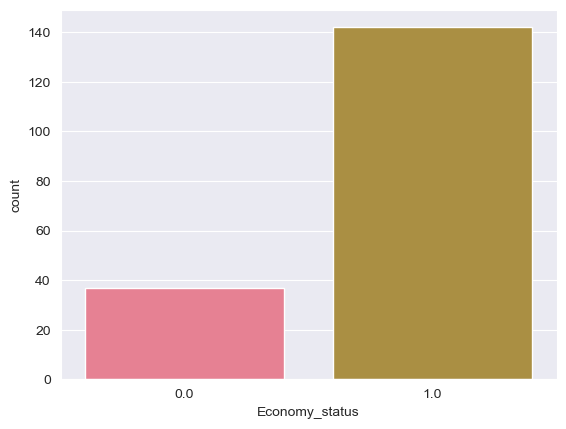

In [ ]:
sns.countplot(data=my_df, x = 'Economy_status')

### Insight:
The analysis of the dataset reveals key insights about life expectancy, economic development, and schooling. The life expectancy distribution peaks around 70 years, indicating most countries have a similar life expectancy. GDP per capita shows significant right-skewness, with most countries having low GDP and a few outliers with very high values, highlighting inequality. Schooling data suggests that most countries have an average of 10-12 years of education, though it leans slightly left-skewed. The economy status barplot shows a clear dominance of economically stable or developed countries, with fewer in the underdeveloped category. Overall, life expectancy correlates positively with schooling and economic development, while the GDP distribution underscores significant disparities between developed and underdeveloped nations.

### Bivariate Analysis

In [ ]:
my_df.columns

Index(['Country', 'Region', 'Year', 'Infant_deaths', 'Under_five_deaths',
       'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status',
       'Life_expectancy'],
      dtype='object')

<Axes: xlabel='Adult_mortality', ylabel='Life_expectancy'>

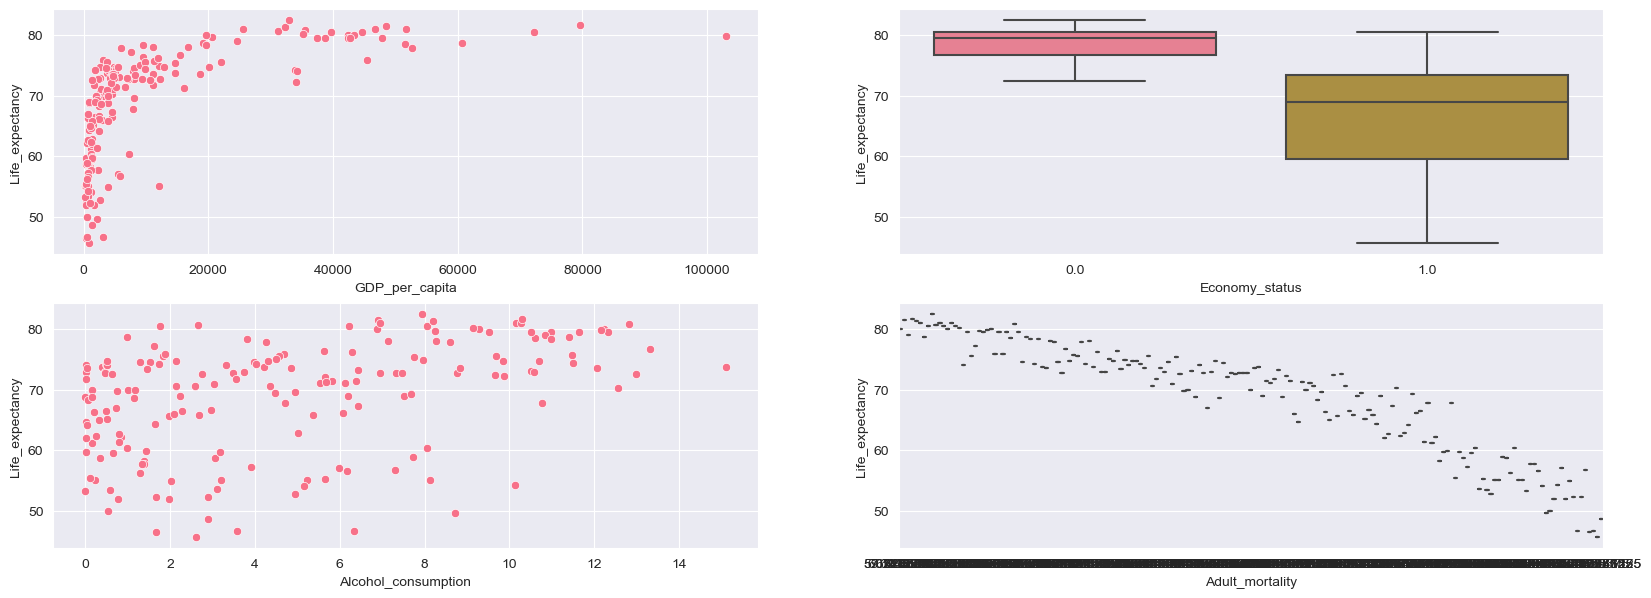

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (20,7))
sns.scatterplot(data=my_df, x = 'GDP_per_capita', y = 'Life_expectancy', ax = axes[0,0])
sns.boxplot(data=my_df, x = 'Economy_status', y = 'Life_expectancy', ax = axes[0,1])
sns.scatterplot(data = my_df, x = 'Alcohol_consumption',y='Life_expectancy', ax = axes[1,0])
sns.boxplot(data = my_df, x = 'Adult_mortality', y = 'Life_expectancy', ax = axes[1,1])


<Axes: xlabel='Life_expectancy', ylabel='Region'>

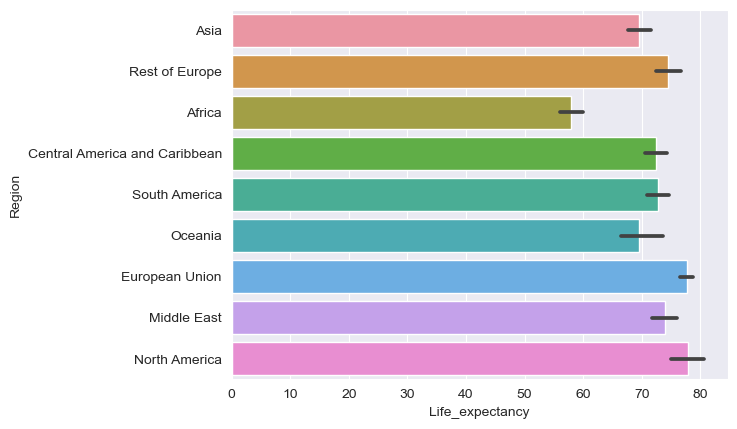

In [ ]:
sns.barplot(data = my_df, x = 'Life_expectancy', y = "Region")

### Insights
The analysis of scatterplots reveals key relationships between variables. A positive nonlinear relationship between life expectancy and GDP per capita is observed, where higher GDP correlates with increased life expectancy. A positive linear trend is seen between life expectancy and schooling, while a negative correlation exists between life expectancy and infant deaths, with higher infant mortality linked to lower life expectancy.

Boxplots show that economically stable regions have higher GDP and life expectancy compared to unstable regions. The barplot highlights that North America and Europe have the highest life expectancy, while Africa and parts of Asia have the lowest, illustrating regional health disparities. Overall, economic stability, GDP, and education are strong predictors of life expectancy, and regions with lower life expectancy require targeted interventions to improve economic and educational opportunities.

### Multivariate Analysis

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



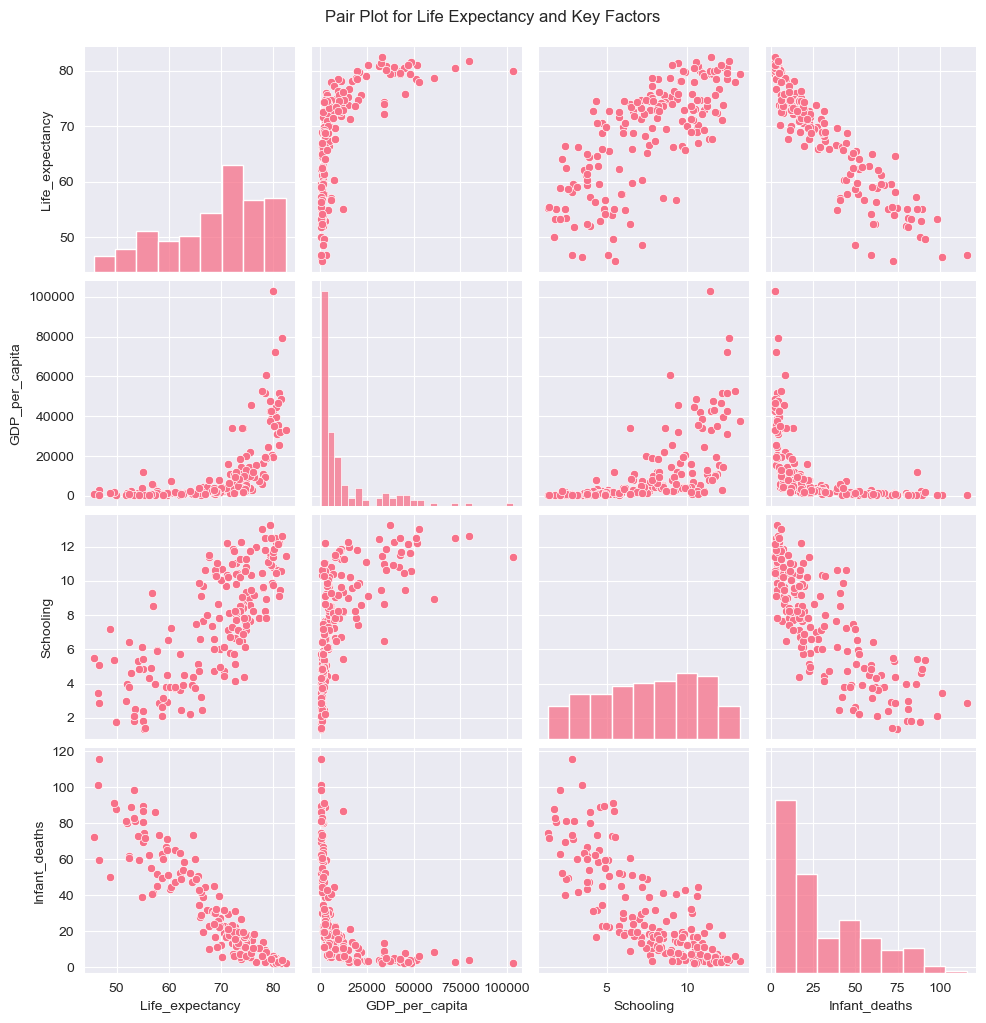

In [ ]:
# Multivariate Analysis:Pair plots to see the interaction between multiple variables.
sns.pairplot(my_df[['Life_expectancy', 'GDP_per_capita', 'Schooling', 'Infant_deaths']])
plt.suptitle('Pair Plot for Life Expectancy and Key Factors', y=1.02)
plt.show()


### Insight:
The pairplot analysis reveals strong relationships between key variables.
* There is a nonlinear relationship between GDP per capita and life expectancy, with diminishing returns at high GDP values.
* A positive correlation between schooling and life expectancy suggests that better education leads to improved health outcomes.
* A strong negative correlation between infant deaths and life expectancy indicates that regions with lower infant mortality tend to have better healthcare and higher life expectancy.
* The patterns highlight the interplay between economic, educational, and health indicators.
* In a nutshell,  focusing on reducing infant mortality and improving education could significantly enhance life expectancy. Additionally, the diminishing returns at high GDP levels imply that beyond a certain point, economic growth alone may not lead to substantial increases in life expectancy.

### STEP 4: Hypothesis testing

Text(0.5, 0.98, 'Correlation Matrix of Life Expentancy, GDP per capita and Schooling')

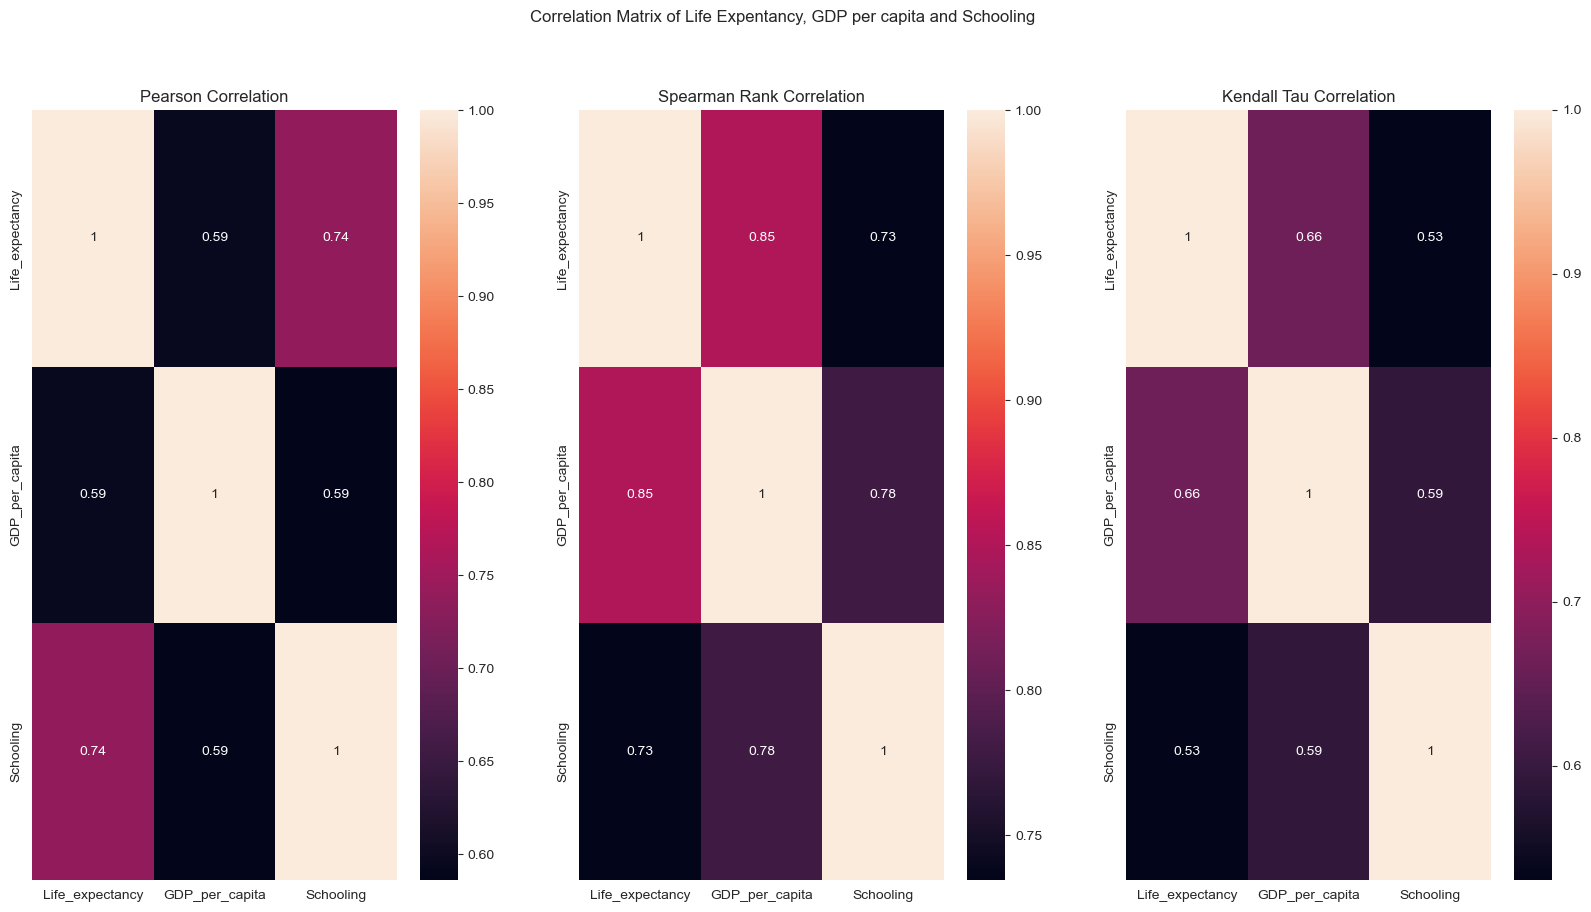

In [ ]:
df_num = my_df[['Life_expectancy', 'GDP_per_capita', 'Schooling']]


df_pearson= df_num.corr(method='pearson')
df_spearman = df_num.corr(method='spearman')
df_kendall = df_num.corr(method='kendall')

fig, axes=plt.subplots(1,3, figsize=(20,10))

sns.heatmap(data=df_pearson, annot=True, ax=axes[0])
sns.heatmap(data=df_spearman, annot=True, ax=axes[1])
sns.heatmap(data=df_kendall, annot=True, ax=axes[2])

axes[0].set_title('Pearson Correlation')
axes[1].set_title('Spearman Rank Correlation')
axes[2].set_title('Kendall Tau Correlation')

plt.suptitle('Correlation Matrix of Life Expentancy, GDP per capita and Schooling')

In [ ]:
# Filter life_expentancy based on economic status
dev = my_df[my_df['Economy_status'] == 1]['Life_expectancy'].value_counts()
un_dev = my_df[my_df['Economy_status'] == 0]['Life_expectancy'].value_counts()

In [ ]:
dev

Life_expectancy
59.65625    2
72.85000    2
72.98750    2
61.29375    1
49.58125    1
           ..
70.66250    1
69.91250    1
74.55625    1
71.38125    1
48.66250    1
Name: count, Length: 139, dtype: int64

In [ ]:
# independent t-Test

# set the hypothesis
ho = f'The mean life expectancy in developed countries is equal to the mean life expectancy in developing countries.'
h1 = f'The mean life expectancy in developed countries is not equal to the mean life expectancy in developing countries'

# set level of significance
alpha = 0.05

# Filter life_expentancy based on economic ctatus
dev = my_df[my_df['Economy_status'] == 1]['Life_expectancy']
un_dev = my_df[my_df['Economy_status'] == 0]['Life_expectancy']
# unpacking
t_statistic, p_value = ttest_ind(dev,un_dev)
#print(f't-statistic: {t_statistic}, p-value: {p_value}')

#decision rule
if p_value < alpha:
    print(f'{h1} @ t-statistic: {t_statistic}, p-value: {p_value}')
else:
    print(f'{ho} @ t-statistic: {t_statistic}, p-value: {p_value}')

The mean life expectancy in developed countries is not equal to the mean life expectancy in developing countries @ t-statistic: -8.469905856499816, p-value: 9.200085420213439e-15


In [ ]:

#Chi square

# Set up our hypothesis
ho = 'There is no significant difference in life expectancy between developed and developing countries'
h1 = 'There is a significant difference in life expectancy between developed and developing countries'

#level of significance
alpha = 0.5

# Choose the test and compute the p-value
chi_df = pd.crosstab(my_df['Life_expectancy'], my_df['Economy_status'])
chi_stat, pvalue, dof, exp_freq = chi2_contingency(chi_df)

# decision rule
if pvalue < alpha:
    print(f'{h1} at p-value = {pvalue}')
else:
    print(f'{ho} at p-value = {pvalue}')

There is a significant difference in life expectancy between developed and developing countries at p-value = 0.44436980111013125


In [ ]:

# Pearson correlation

# Observing the significance relationship between the number of GDP_per_capita and Life_expectancy
#step 1: Set the null and alternative hypothesis
h0 = 'There is no significant relationship between GDP_per_capita and Life_expectancy'
h1 = 'There is a significant relationship between GDP_per_capita  and Life_expectancy'

#Step 2: level of significance
alpha = 0.05

#Calculate Pearson correlation coefficient
corr_coef, p_Value = pearsonr(my_df['GDP_per_capita'], my_df['Life_expectancy'])

#decision rule
if p_Value < alpha:
    print(f'{h1} @ p-value = {p_Value}')
else:
    print(f'{ho} @ p-value = {p_Value}')


There is a significant relationship between GDP_per_capita  and Life_expectancy @ p-value = 1.6091712635838857e-18


## Step 5 Discusion amd Findings


The findings from this analysis provide valuable insights into the relationship between socio-economic, health indicators, and life expectancy.
* A choropleth map visualized life expectancy across regions, revealing significant geographical disparities, with higher life expectancy in developed countries and lower life expectancy in some regions of Africa and Asia. Line plots demonstrated the variation of life expectancy over time, while regression plots illustrated the impact of schooling and infant mortality on life expectancy.
* A strong linear relationship was found between schooling and life expectancy, with more education correlating with better health outcomes. Conversely, higher infant mortality was associated with lower life expectancy, emphasizing the importance of healthcare access.
* Statistical analysis confirmed significant differences in life expectancy between developed and developing countries, with a t-statistic of -8.47 and a p-value well below the threshold for significance. Furthermore, the analysis revealed a significant relationship between GDP per capita and life expectancy, though with diminishing returns at higher GDP levels, suggesting that economic growth alone may not substantially improve life expectancy after a certain threshold.

* These findings underscore the importance of targeted interventions in healthcare and education to improve life expectancy, particularly in developing countries.